In [1]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

## Data Import

Nothing special, just import all the data into numpy arrays and make them ready for usage.

In [2]:
path_data="mc_z0experiment-main/"

ee_file = uproot.open(path_data+'ee.root')
ee_ttree_name = 'myTTree'
ee_branches = ee_file[ee_ttree_name].arrays()
ee_ctrk = ak.to_numpy(ee_branches.Ncharged)
ee_sump = ak.to_numpy(ee_branches.Pcharged)
ee_ecal = ak.to_numpy(ee_branches.E_ecal)
ee_hcal = ak.to_numpy(ee_branches.E_hcal)

mm_file = uproot.open(path_data+'mm.root')
mm_ttree_name = 'myTTree'
mm_branches = mm_file[mm_ttree_name].arrays()
mm_ctrk = ak.to_numpy(mm_branches.Ncharged)
mm_sump = ak.to_numpy(mm_branches.Pcharged)
mm_ecal = ak.to_numpy(mm_branches.E_ecal)
mm_hcal = ak.to_numpy(mm_branches.E_hcal)

qq_file = uproot.open(path_data+'qq.root')
qq_ttree_name = 'myTTree'
qq_branches = qq_file[qq_ttree_name].arrays()
qq_ctrk = ak.to_numpy(qq_branches.Ncharged)
qq_sump = ak.to_numpy(qq_branches.Pcharged)
qq_ecal = ak.to_numpy(qq_branches.E_ecal)
qq_hcal = ak.to_numpy(qq_branches.E_hcal)

tt_file = uproot.open(path_data+'tt.root')
tt_ttree_name = 'myTTree'
tt_branches = tt_file[tt_ttree_name].arrays()
tt_ctrk = ak.to_numpy(tt_branches.Ncharged)
tt_sump = ak.to_numpy(tt_branches.Pcharged)
tt_ecal = ak.to_numpy(tt_branches.E_ecal)
tt_hcal = ak.to_numpy(tt_branches.E_hcal)

## Histograms

Now plot the data (by propertie and not by particle) and analyse them.

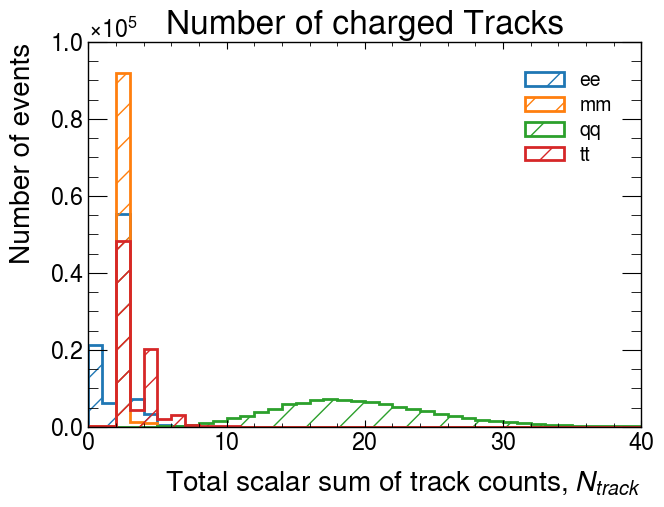

In [3]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bins1 = np.linspace(0,40,41)

plt.hist(ee_ctrk,bins=bins1, histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Number of charged Tracks')
#plt.xlim(0,10)
plt.xlabel('Total scalar sum of track counts, $N_{track}$')
plt.ylabel('Number of events')
plt.legend()
plt.show()

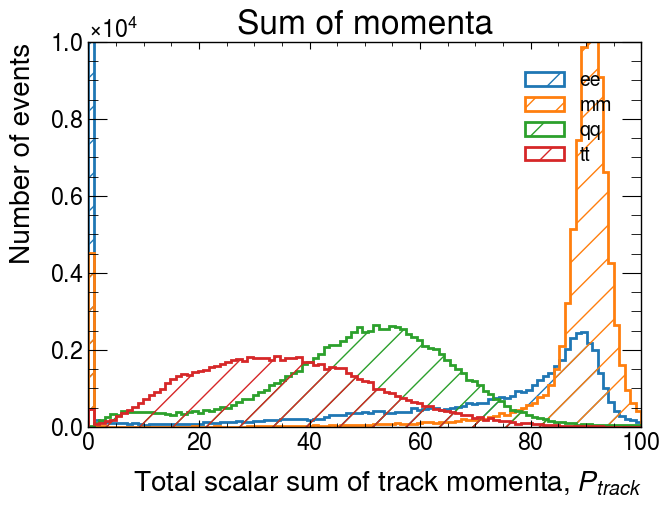

In [4]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

plt.hist(ee_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Sum of momenta')
#plt.xlim(0,20)
plt.xlabel('Total scalar sum of track momenta, $P_{track}$')
plt.ylabel('Number of events')
plt.ylim(0,10000)
plt.legend()
plt.show()

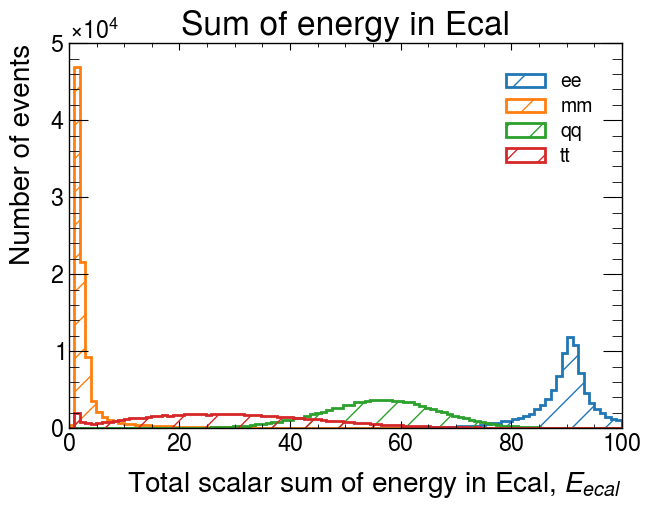

In [5]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

plt.hist(ee_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Sum of energy in Ecal')
#plt.xlim(0,20)
plt.xlabel('Total scalar sum of energy in Ecal, $E_{ecal}$')
plt.ylabel('Number of events')
#plt.ylim(200)
plt.legend()
plt.show()

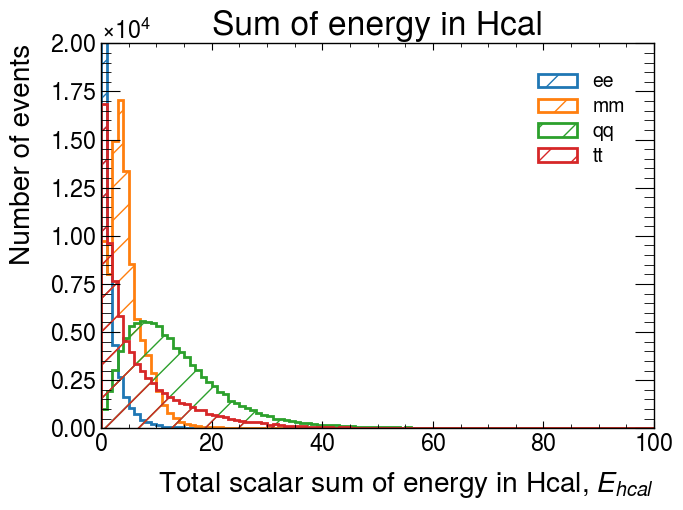

In [6]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bins4 = np.linspace(0,100,101)

plt.hist(ee_hcal,bins=bins4, histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Sum of energy in Hcal')
#plt.xlim(0,2)
plt.xlabel('Total scalar sum of energy in Hcal, $E_{hcal}$')
plt.ylabel('Number of events')
plt.ylim(0,20000)
plt.legend()
plt.show()

## Particle ID

A collection of several algorithms to do the particle ID.

We use a majority voting system and weights for individual decissions.

IDs:
- qq / Hadronic = 1
- ee = 2
- mm = 3
- tt = 4


In [7]:
def particleID(ctrk,sump,ecal,hcal,details=False):
    had_count =0
    e_count = 0
    m_count = 0
    tau_count = 0
    
    if (8 <= ctrk <= 38): had_count += 1*3
    if (0 <= ctrk <= 4): e_count += 1
    if (2 <= ctrk <= 3): m_count += 1 * 2
    if (2 <= ctrk <= 7): tau_count += 1 * 2
        
    if (0 <= sump <= 80): had_count += 1
    if (0 <= sump <= 1) or (20 <= sump <= 1000): e_count += 1
    if (0 <= sump <= 1) or (70 <= sump <= 1000): m_count += 1 * 1.5
    if (5 <= sump <= 70): tau_count += 1 * 1.5
        
    if (20 <= ecal <= 90): had_count += 1 
    if (70 <= ecal <= 1000): e_count += 1 * 2
    if (1 <= ecal <= 11): m_count += 1
    if (11 <= ecal <= 75): tau_count += 1 
        
    if (3 <= hcal <= 50): had_count += 1
    if (0 <= hcal <= 7): e_count += 1
    if (0 <= hcal <= 14): m_count += 1
    if (0 <= hcal <= 35): tau_count += 1
        
    
    if details:
        print("Hadronic:",had_count,"Electron:",e_count,"Muon:",m_count,"Tau:",tau_count)
        
    return [had_count,e_count,m_count,tau_count]

def array_ID(ctrk,sump,ecal,hcal):
    
    result = []
    for i in range(0,len(ctrk)):
        result.append(particleID(ctrk[i],sump[i],ecal[i],hcal[i]))
    return result

In [8]:
def particle_ID_1234(ctrk,sump,ecal,hcal):
    namelist = []
    spare_list = []
    particle_list = array_ID(ctrk,sump,ecal,hcal)
    for particle in particle_list:
        name = []
        indices = [i for i, x in enumerate(particle) if x == max(particle)]
        if 0 in indices:
            name = 1
        if 1 in indices:
            name = 2
        if 2 in indices:
            name = 3
        if 3 in indices:
            name = 4
        if len(indices) != 1:
            name=0
            spare_list.append(np.array(indices)+1)
        namelist.append(name)
    return [namelist,spare_list]

## Efficency Matrix

In [9]:
def eff(id_array,Errorcounter=False):
    results = np.array([0,0,0,0])
    errors = 0
    for particle in id_array:
        if particle != 0:
            results[particle-1] += 1
        else:
            errors += 1
    
    if Errorcounter:
        print(errors)
    return results

            

In [10]:
id_ee = particle_ID_1234(ee_ctrk,ee_sump,ee_ecal,ee_hcal)[0]
id_qq = particle_ID_1234(qq_ctrk,qq_sump,qq_ecal,qq_hcal)[0]
id_mm = particle_ID_1234(mm_ctrk,mm_sump,mm_ecal,mm_hcal)[0]
id_tt = particle_ID_1234(tt_ctrk,tt_sump,tt_ecal,tt_hcal)[0]

In [117]:
qq_eff = eff(id_qq,Errorcounter = True)
ee_eff = eff(id_ee,Errorcounter = True)
mm_eff = eff(id_mm,Errorcounter = True)
tt_eff = eff(id_tt,Errorcounter = True)

print("qq | ee  | mm |tt")
print(qq_eff/len(id_qq),np.sum(qq_eff)/len(id_qq))
print(ee_eff/len(id_ee),np.sum(ee_eff)/len(id_ee))
print(mm_eff/len(id_mm),np.sum(mm_eff)/len(id_mm))
print(tt_eff/len(id_tt),np.sum(tt_eff)/len(id_tt))

mat = [qq_eff/len(id_qq),ee_eff/len(id_ee),mm_eff/len(id_mm),tt_eff/len(id_tt)]

169
72
3
137
qq | ee  | mm |tt
[9.86881487e-01 1.11603746e-04 5.07289754e-05 1.12415409e-02] 0.9982853606322859
[9.59467815e-05 9.70437731e-01 1.06500927e-02 1.80486557e-02] 0.9992324257478519
[1.16548882e-04 1.37739587e-04 9.66614043e-01 3.30998824e-02] 0.9999682139413654
[0.00806676 0.00409019 0.008193   0.97792057] 0.9982705077385311


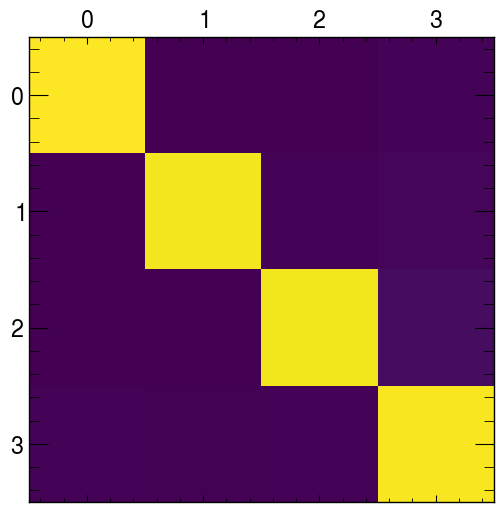

In [118]:
plt.matshow(mat)

## Effiency  & Background

In [119]:
print("Effiency for qq:",qq_eff[0],"Background:",ee_eff[0]+mm_eff[0]+tt_eff[0])
print("Effiency for ee:",ee_eff[1],"Background:",qq_eff[1]+mm_eff[1]+tt_eff[1])
print("Effiency for mm:",mm_eff[2],"Background:",qq_eff[2]+ee_eff[2]+tt_eff[2])
print("Effiency for tt:",tt_eff[3],"Background:",qq_eff[3]+ee_eff[3]+mm_eff[3])

Effiency for qq: 97270 Background: 659
Effiency for ee: 91029 Background: 348
Effiency for mm: 91230 Background: 1653
Effiency for tt: 77465 Background: 5925


In [120]:
issue_id_tt = particle_ID_1234(tt_ctrk,tt_sump,tt_ecal,tt_hcal)[1]

In [121]:
def issue_stat(issue_list):
    histogramlist = np.array([0,0,0,0])
    for i in issue_list:
        for j in i:
            histogramlist[j-1] += 1
    return histogramlist
print("qq | ee  | mm |tt")
print(issue_stat(issue_id_tt))


qq | ee  | mm |tt
[106  85   1  99]


## Errors

The errors for the histogram bin counts is the sqrt of the number for this bin.

The errors for the efficiencies are derived from a poisson distribution of each individual decision per channel.

In [122]:
var_qq = np.sqrt(qq_eff)/len(id_qq)
var_ee = np.sqrt(ee_eff)/len(id_ee)
var_mm = np.sqrt(mm_eff)/len(id_mm)
var_tt = np.sqrt(tt_eff)/len(id_tt)

var_qq = np.sqrt((np.sqrt(qq_eff)/len(id_qq))**2+(np.sqrt(len(id_qq))*qq_eff/len(id_qq)**2)**2)
var_ee = np.sqrt((np.sqrt(ee_eff)/len(id_ee))**2+(np.sqrt(len(id_ee))*ee_eff/len(id_qq)**2)**2)
var_mm = np.sqrt((np.sqrt(mm_eff)/len(id_mm))**2+(np.sqrt(len(id_mm))*mm_eff/len(id_qq)**2)**2)
var_tt = np.sqrt((np.sqrt(tt_eff)/len(id_tt))**2+(np.sqrt(len(id_tt))*tt_eff/len(id_qq)**2)**2)
mat_error=[var_qq,var_ee,var_mm,var_tt]
print(var_qq)
print(var_ee)
print(var_mm)
print(var_tt)
print(mat_error)

[4.46027387e-03 3.36516731e-05 2.26872629e-05 3.39612305e-04]
[3.19835191e-05 4.31063693e-03 3.38422751e-04 4.41883609e-04]
[3.51425317e-05 3.82043001e-05 4.30872185e-03 6.00387342e-04]
[0.00031965 0.00022743 0.00032215 0.00416919]
[array([4.46027387e-03, 3.36516731e-05, 2.26872629e-05, 3.39612305e-04]), array([3.19835191e-05, 4.31063693e-03, 3.38422751e-04, 4.41883609e-04]), array([3.51425317e-05, 3.82043001e-05, 4.30872185e-03, 6.00387342e-04]), array([0.00031965, 0.00022743, 0.00032215, 0.00416919])]


# Exercise 2

In [123]:
ee_cos1 = ak.to_numpy(ee_branches.cos_thru)
ee_cos2 = ak.to_numpy(ee_branches.cos_thet)

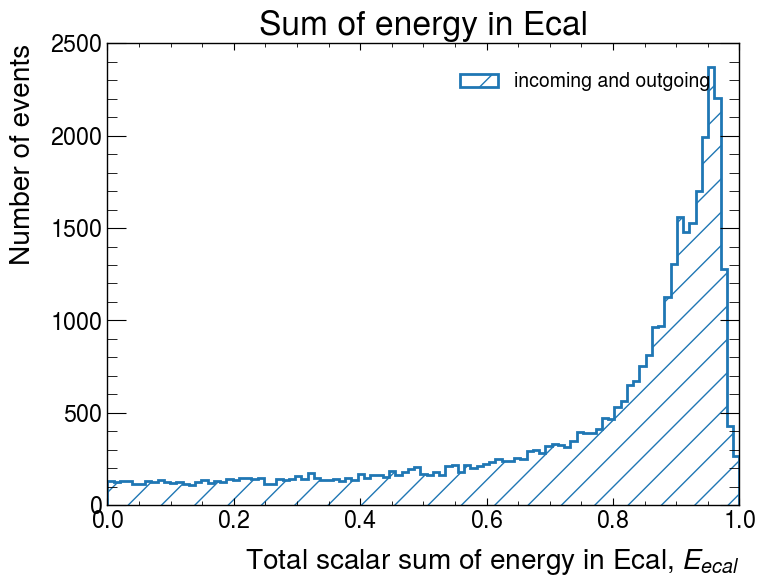

In [124]:
#plt.hist(ee_cos1,bins=101,range=(0.,1), histtype='step',  linewidth=2,  hatch='/', label='beam and trust axis')
plt.hist(ee_cos2,bins=101,range=(0.,1), histtype='step',  linewidth=2,  hatch='/', label='incoming and outgoing')

plt.title('Sum of energy in Ecal')
#plt.xlim(0,20)
plt.xlabel('Total scalar sum of energy in Ecal, $E_{ecal}$')
plt.ylabel('Number of events')
#plt.ylim(200)
plt.legend()
plt.show()

C:\Users\leon\AppData\Local\Temp\ipykernel_13784\4170824413.py:3: RuntimeWarning: divide by zero encountered in power
  t_channel = (1-x)**(-2)


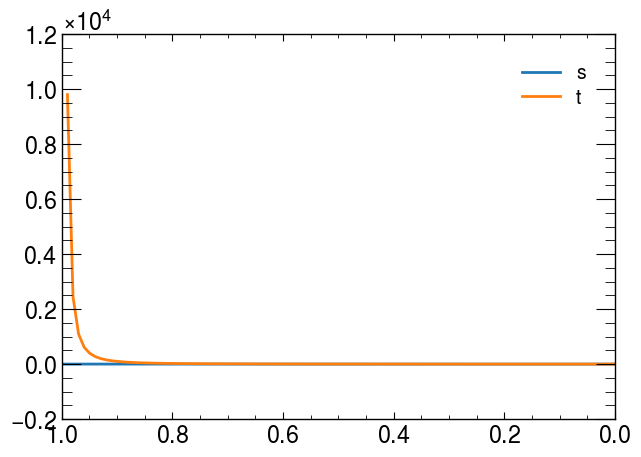

In [125]:
x = np.linspace(1,0,100)
s_channel = (1+x**2)
t_channel = (1-x)**(-2)


plt.figure(figsize=(7,5))
plt.plot(x,s_channel,label="s")
plt.plot(x,t_channel,label="t")
plt.xlim(1,0)
plt.legend()

In [126]:
from scipy.optimize import curve_fit


[21.97736643  1.24443909]
[28.01398669  1.21087095 -3.55204557]


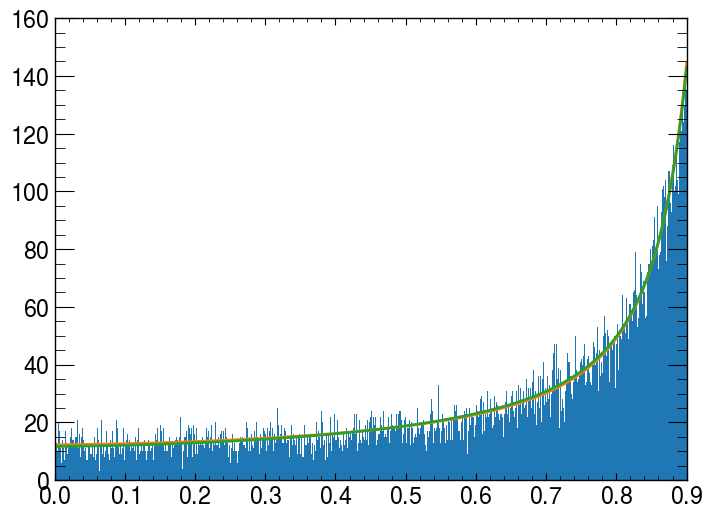

In [127]:
def fits(x,a,b):
    return a/2*(1+x**2) +b*(1-x)**(-2)
def fits1(x,a,b,c):
    return a/2*(1+x**2) +b*(1-x)**(-2) +c

angles2 = np.linspace(0,0.9,910)
new_bin_content, new_bin_edges,_ =plt.hist(ee_cos2,angles2)
new_mid = 0.5*(new_bin_edges[1:] + new_bin_edges[:-1])


coeff, var_matrix = curve_fit(fits, new_mid, new_bin_content)
coeff1, var_matrix1 = curve_fit(fits1, new_mid, new_bin_content)

print(coeff)
print(coeff1)

plt.plot(angles2,fits(angles2,coeff[0],coeff[1]))
plt.plot(angles2,fits1(angles2,coeff1[0],coeff1[1],coeff1[2]))

In [128]:
#s_sum = 110.86523553 * (0.9 * (1/3)*0.9**3)
#t_sum = 12.594124 * (1/(1-0.9))

s_sum = 126.710
t_sum = 113.347

print("Summ of s-events",s_sum,"t_sum",t_sum," Proportion:",s_sum / (s_sum+t_sum))
print("Area of histo:",len(ee_cos2) *0.01," and area by analytics:",s_sum+t_sum)

Summ of s-events 126.71 t_sum 113.347  Proportion: 0.5278329730022453
Area of histo: 938.02  and area by analytics: 240.057


In [129]:

from scipy.optimize import curve_fit

matrix = np.array(mat)

matrix_inv= np.linalg.inv(matrix)
error_matrix = np.array(mat_error)


### Number of toy experiments to be done
ntoy = 10000

### Create numpy matrix of list to append elements of inverted toy matrices
inverse_toys = np.empty((4,4))

# Create toy efficiency matrix out of gaussian-distributed random values
for i in range(0,ntoy,1):
    toy_matrix = np.zeros((4,4))
    toy_matrix = np.random.normal(matrix,error_matrix,size=(4,4))
    
    ### Invert toy matrix
    inverse_toy = np.linalg.inv(toy_matrix)
    
    #print(inverse_toys.item(0,0),inverse_toy.item(0,0))
    # Append values
    inverse_toys = np.dstack((inverse_toys,inverse_toy))


Erros for the inverse matrix:
[[4.50772908e-03 3.58454715e-05 2.44903164e-05 3.47883489e-04]
 [3.42626306e-05 4.53143377e-03 3.69514538e-04 4.81090357e-04]
 [3.93895444e-05 4.15198347e-05 4.69429219e-03 6.79230683e-04]
 [3.37894356e-04 2.43276920e-04 3.53278701e-04 4.40483291e-03]]


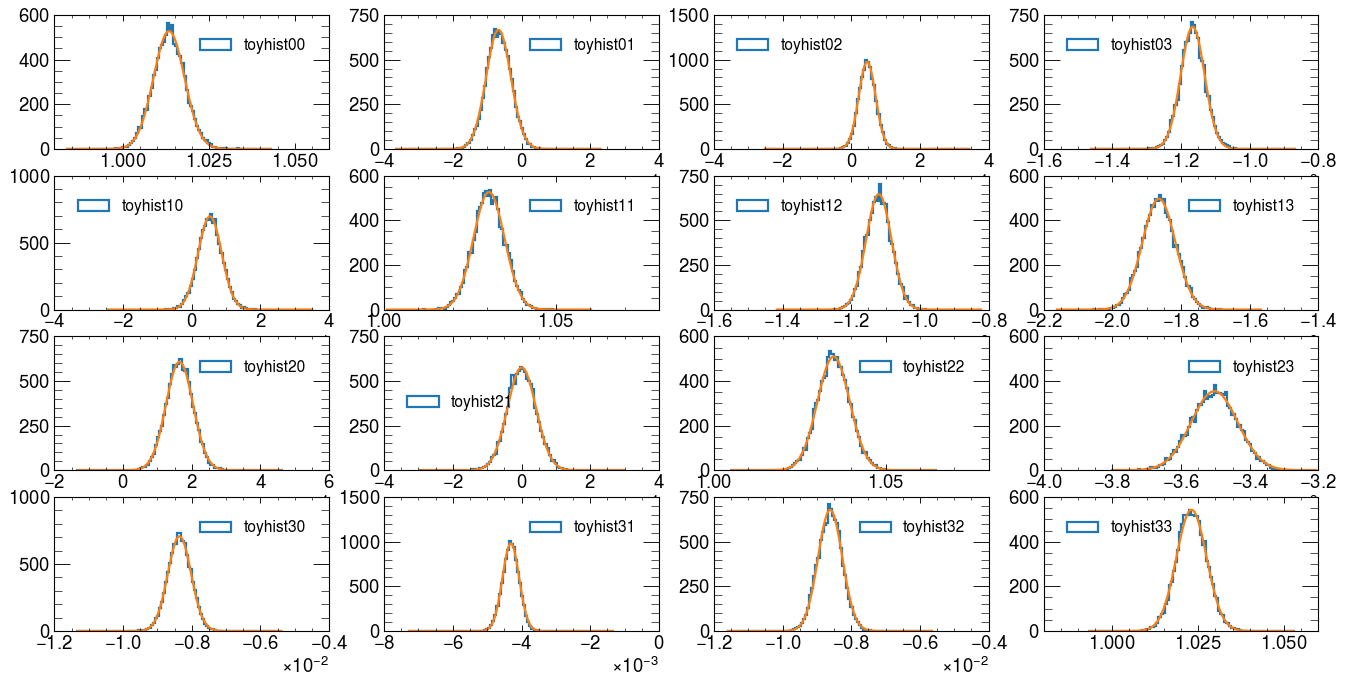

In [131]:

    
# Define gaussian function to fit to the toy distributions:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


inverse_errors = np.zeros((4,4))
inverse_means = np.zeros((4,4))


fig = plt.figure(figsize=(20, 10),dpi=80)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
ax00 = plt.subplot(4,4,1)
ax01 = plt.subplot(4,4,2)
ax02 = plt.subplot(4,4,3)
ax03 = plt.subplot(4,4,4)

ax10 = plt.subplot(4,4,5)
ax11 = plt.subplot(4,4,6)
ax12 = plt.subplot(4,4,7)
ax13 = plt.subplot(4,4,8)

ax20 = plt.subplot(4,4,9)
ax21 = plt.subplot(4,4,10)
ax22 = plt.subplot(4,4,11)
ax23 = plt.subplot(4,4,12)

ax30 = plt.subplot(4,4,13)
ax31 = plt.subplot(4,4,14)
ax32 = plt.subplot(4,4,15)
ax33 = plt.subplot(4,4,16)

axes = [[ax00,ax01,ax02,ax03],
        [ax10,ax11,ax12,ax13],
        [ax20,ax21,ax22,ax23],
        [ax30,ax31,ax32,ax33]]
dx=0.03
dx1=0.003
dx2=0.0003
## IMPORTANT! Find suitable ranges to fit/plot gaussian distributions successfully!
ranges = [[(matrix_inv[0][0]-dx,matrix_inv[0][0]+dx),(matrix_inv[0][1]-dx2,matrix_inv[0][1]+dx2), (matrix_inv[0][2]-dx2,matrix_inv[0][2]+dx2), (matrix_inv[0][3]-dx1,matrix_inv[0][3]+dx1)],
          [(matrix_inv[1][0]-dx2,matrix_inv[1][0]+dx2),(matrix_inv[1][1]-dx,matrix_inv[1][1]+dx), (matrix_inv[1][2]-dx1,matrix_inv[1][2]+dx1), (matrix_inv[1][3]-dx1,matrix_inv[1][3]+dx1)],
          [(matrix_inv[2][0]-dx2,matrix_inv[2][0]+dx2),(matrix_inv[2][1]-dx2,matrix_inv[2][1]+dx2), (matrix_inv[2][2]-dx,matrix_inv[2][2]+dx), (matrix_inv[2][3]-dx1,matrix_inv[2][3]+dx1)],
          [(matrix_inv[3][0]-dx1,matrix_inv[3][0]+dx1),(matrix_inv[3][1]-dx1,matrix_inv[3][1]+dx1), (matrix_inv[3][2]-dx1,matrix_inv[3][2]+dx1), (matrix_inv[3][3]-dx,matrix_inv[3][3]+dx)]]


# Fill histograms for each inverted matrix coefficient:
for j in range(0,4,1):
    for k in range(0,4,1):
        
        # Diagonal and off-diagonal terms have different histogram ranges
        hbins, hedges, _ = axes[j][k].hist(inverse_toys[j,k,:],bins=100,range=ranges[j][k],  histtype='step', linewidth=2, label=f'toyhist{j}{k}')
        axes[j][k].legend()

        ## Guess initial parameters of the fit by taking random value from hist and std
        _p0 = [ntoy/10.,np.std(inverse_toys[j,k,:]),np.std(inverse_toys[j,k,:])]
        if j==k:
            sig=dx
        else:
            sig=dx2
            
        # Get the fitted curve
        h_mid = 0.5*(hedges[1:] + hedges[:-1]) #Calculate midpoints for the fit
        coeffs, _ = curve_fit(gauss, h_mid, hbins, p0=[600,matrix_inv[j][k],sig], maxfev=100000)
        h_fit = gauss(h_mid, *coeffs)
        
        axes[j][k].plot(h_mid, h_fit,label=f'Fit{j}{k}')

        inverse_means[j,k] = coeffs[1]
        inverse_errors[j,k] = abs(coeffs[2])

print(f"Erros for the inverse matrix:\n{inverse_errors}")

